# Creating my own custom Model


This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


## **Importing the necessary modules**

In [29]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## **Loading the dataset and Viewing properties of the dataset**


In [30]:
water_quality_df = pd.read_csv("water_potability.csv")
water_quality_df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Getting the **dimensions** or **shape** of my dataset

In [31]:
water_quality_df.shape

(3276, 10)

Here we are using the **.info()** to get information concerning each columns i.e. **Dtype (data type)** and the total number of **Non-Null** rows for each column, as we can see not all columns have all rows to be **Non-Null**  it should be a total of **3276** non-null rows.

In [32]:
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


But the **.info()** gives us different info but if we want to know just the sum of nullable rows in each column in a better format, we would use the combination of **.isna()** and **sum()** methods.

In [33]:
water_quality_df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


### **Checking the Statistical Properties of our data with NAN**

In [34]:
water_quality_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **Preprocessing Data**

**First we would fill in the rows with NaN because we dont want to lose vital information, because if we drop rows with nan we lose variety and volume needed for training this model, so we don't want to do that.**

In [35]:
# we are uing the `interpolate` method in pandas to fill in nan
water_quality_df.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

In [36]:
water_quality_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,364.639673,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,360.762904,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
water_quality_df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


**We can see that the difference in describe method when water quality dataframe had NaN values and now without any is siginificantly small so the interpolate method I used with the parameters I chose is preserving the overall distribution and chracteristics of our data**

In [38]:
water_quality_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.068998,196.369496,22014.092526,7.122277,333.741509,426.205111,14.284970,66.461927,3.966786,0.390110
std,1.534387,32.879761,8768.570828,1.583085,38.870128,80.824064,3.308162,15.980497,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.117357,176.850538,15666.690297,6.127421,310.174409,365.734414,12.065801,55.988340,3.439711,0.000000
50%,7.034491,196.967627,20927.833607,7.130299,332.960442,421.884968,14.218338,66.691179,3.955028,0.000000
75%,7.992100,216.667456,27332.762127,8.114887,357.388145,481.792304,16.557652,77.215957,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Creating a correlation matrix to look for multicollinearity between features, which suggests these features are redundant and may not provide additional information for our machine learning model making our model unstable due to misinterpretation of model's coefficient.**

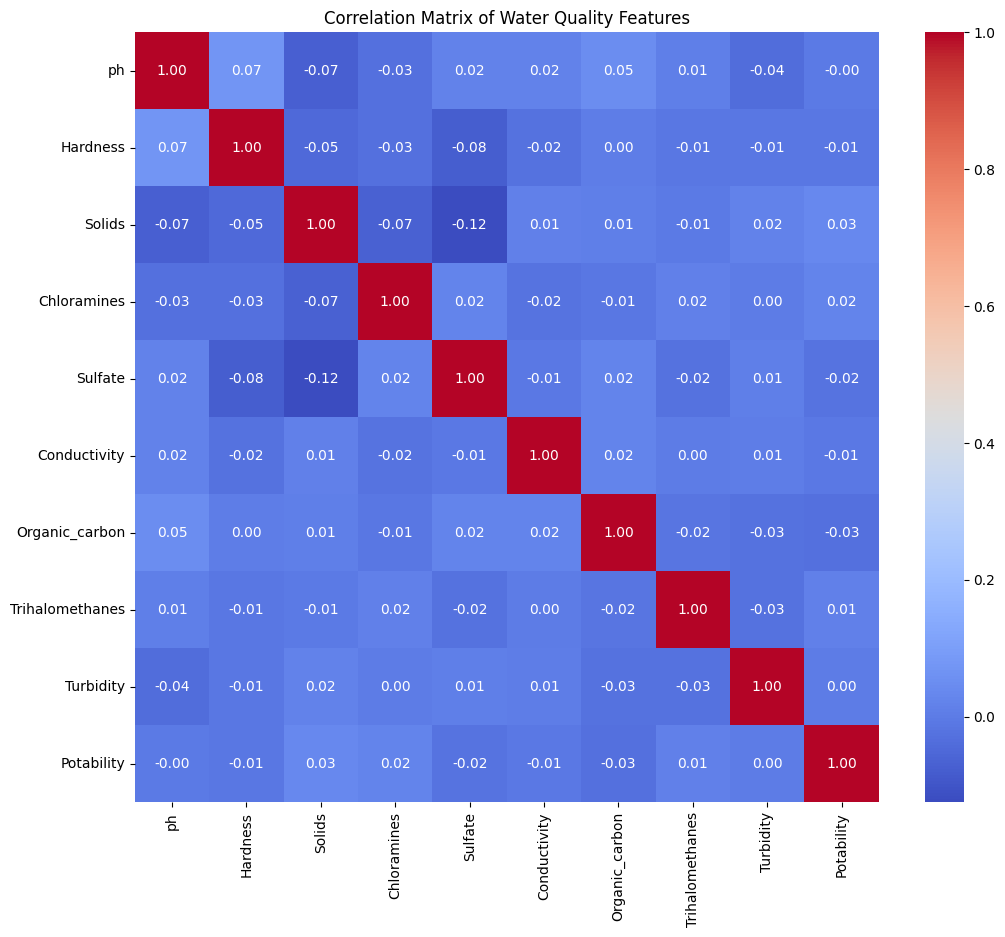

In [39]:
correlation_matrix = water_quality_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Water Quality Features")
plt.show()

**Examining our data if there is Potability Label imbalance cause it appears that we have more labels for zeros than one the code below shows that.**

In [40]:
zero, one = np.bincount(water_quality_df['Potability'])
total = zero + one
print("Examples:\n  Total: {}\n  zero: {} ({:.2f}% of total)\n  one: {} ({:.2f}% of total)".format(
    total, zero, 100 * zero / total, one, 100 * one / total))

Examples:
  Total: 3276
  zero: 1998 (60.99% of total)
  one: 1278 (39.01% of total)


**Splitting our dataset into 70% train, 15% validation, 15% test**

In [41]:
train_df, test_df = train_test_split(water_quality_df, test_size=0.15)
train_df, val_df = train_test_split(train_df, test_size=0.15)

# Extract features and labels
train_labels = np.array(train_df.pop('Potability')).reshape(-1, 1)
val_labels = np.array(val_df.pop('Potability')).reshape(-1, 1)
test_labels = np.array(test_df.pop('Potability')).reshape(-1, 1)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

print("Train set size:", train_df.shape)
print("Validation set size:", val_df.shape)
print("Test set size:", test_df.shape)

Train set size: (2366, 9)
Validation set size: (418, 9)
Test set size: (492, 9)


**Normalize the data to ensure all features are in the same range, for this we will be using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1**

**Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.**

In [42]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (2366, 1)
Validation labels shape: (418, 1)
Test labels shape: (492, 1)
Training features shape: (2366, 9)
Validation features shape: (418, 9)
Test features shape: (492, 9)


## Define the model and metrics
**Define a function that creates a deep neural network with a densly connected hidden layers, add dropout layer to reduce overfitting if noticed, and an output sigmoid layer that returns the probability of water being potable**

In [43]:

# Model
METRICS = [
    keras.metrics.BinaryCrossentropy(name="cross_entropy"),
    keras.metrics.MeanSquaredError(name="brier_score"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(name="auc"),
]

def dense_block(units, dropout_rate=0.5, l2_reg=1e-4):
    """Creates a fully connected block with L2 regularization, Batch Normalization, and Dropout."""
    return [
        keras.layers.Dense(
            units,
            activation=None,
            kernel_initializer="he_normal",
            kernel_regularizer=keras.regularizers.l2(l2_reg),
        ),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        keras.layers.Dropout(dropout_rate),
    ]

def create_model(input_shape, metrics=METRICS):

    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=input_shape),

        *dense_block(16, dropout_rate=0.2),
        *dense_block(256, dropout_rate=0.3),
        *dense_block(512, dropout_rate=0.4),
        *dense_block(1024, dropout_rate=0.5),
        *dense_block(2048, dropout_rate=0.5),

        keras.layers.Dense(1, activation="sigmoid")
    ])

    lr_scheduler = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    )

    # Early Stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=4, restore_best_weights=True, verbose=1
    )

    # Compile model with AdamW (Weight Decay helps generalization)
    model.compile(
        optimizer=keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4),
        loss=keras.losses.Hinge(),
        metrics=metrics,
    )

    return model, [early_stopping, lr_scheduler]


###**Understanding useful metrics**
**Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance. These can be divided into three groups.**

###**Metrics for probability predictions**
**As we train our network with the cross entropy as a loss function, it is fully capable of predicting class probabilities, i.e., it is a probabilistic classifier. Good metrics to assess probabilistic predictions are, in fact, proper scoring rules. Their key property is that predicting the true probability is optimal. We give two well-known examples**

**- cross entropy also known as log loss**

**- Mean squared error also known as the Brier score**

###**Metrics for deterministic 0/1 predictions**
**In the end, one often wants to predict a class label, 0 or 1, not potable or potable. This is called a deterministic classifier. To get a label prediction from our probabilistic classifier, one needs to choose a probability threshold. The default is to predict label 1 (potable) if the predicted probability is larger than 50%
 and all the following metrics implicitly use this default.**

**- False negatives and false positives are samples that were incorrectly classified.**

**- True negatives and true positives are samples that were correctly classified.**

**- Accuracy is the percentage of examples correctly classified.**

**- Precision is the percentage of predicted positives that were correctly classified.**

**- Recall is the percentage of actual positives that were correctly classified.**


###**Build the model**
Now create and train your model using the function that was defined earlier. Notice that the model is fit using a larger than default batch size of 2048, this is important to ensure that each batch has a decent chance of containing a few potable samples. If the batch size was too small, they would likely have no potable class to learn from.



In [44]:
EPOCHS = 800
BATCH_SIZE = 2048

In [45]:

input_shape = (train_features.shape[-1],)
model, callbacks = create_model(input_shape)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 2048)                │              

 Total params: 2,778,081 (10.60 MB)

 Trainable params: 2,770,369 (10.57 MB)

 Non-trainable params: 7,712 (30.12 KB)

**Test run the model:**

In [46]:
history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

Epoch 1/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5071 - auc: 0.4972 - brier_score: 0.3055 - cross_entropy: 0.8720 - fn: 465.6667 - fp: 648.0000 - loss: 1.8766 - precision: 0.3920 - recall: 0.4747 - tn: 728.3333 - tp: 418.0000 - val_accuracy: 0.4019 - val_auc: 0.5125 - val_brier_score: 0.5658 - val_cross_entropy: 2.8528 - val_fn: 0.0000e+00 - val_fp: 250.0000 - val_loss: 1.9559 - val_precision: 0.4019 - val_recall: 1.0000 - val_tn: 0.0000e+00 - val_tp: 168.0000
Epoch 2/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5974 - auc: 0.5286 - brier_score: 0.3121 - cross_entropy: 1.0080 - fn: 715.0000 - fp: 194.6667 - loss: 1.7997 - precision: 0.4767 - recall: 0.1990 - tn: 1173.0000 - tp: 177.3333 - val_accuracy: 0.4019 - val_auc: 0.4844 - val_brier_score: 0.5771 - val_cross_entropy: 3.6502 - val_fn: 0.0000e+00 - val_fp: 250.0000 - val_loss: 1.9527 - val_precision: 0.4019 - val_recall: 1.0000 - val_tn: 0.0000e+00 - val_tp: 168.0000
Epoch 3/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s

In [47]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [48]:
test_loss, *other_metrics = model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 1.0208


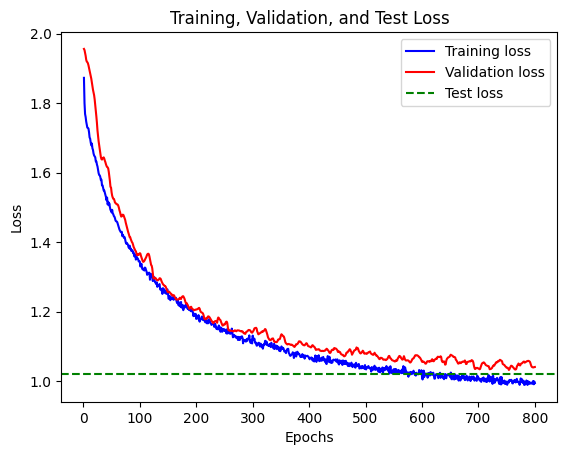

In [49]:
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Evaluate metrics
I would use a confusion matrix to summarize the actual vs. predicted labels, where the X axis is the predicted label and the Y axis is the actual label:

In [50]:
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


In [51]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non-Potable Water Detected (True Negatives): ', cm[0][0])
  print('Non-Potable Water Incorrectly Detected (False Positives): ', cm[0][1])
  print('Potable Water Missed (False Negatives): ', cm[1][0])
  print('Potable Water Detected (True Positives): ', cm[1][1])
  print('Total Potable Water: ', np.sum(cm[1]))

Non-Potable Water Detected (True Negatives):  294
Non-Potable Water Incorrectly Detected (False Positives):  20
Potable Water Missed (False Negatives):  131
Potable Water Detected (True Positives):  47
Total Potable Water:  178


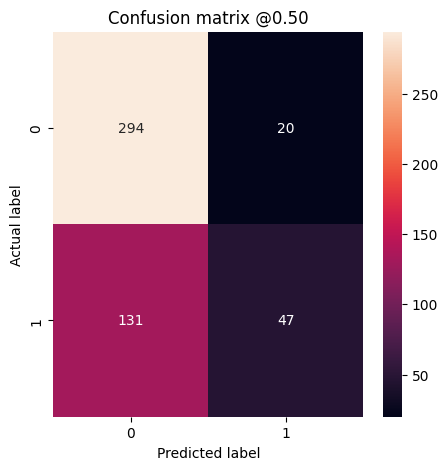

In [52]:
plot_cm(test_labels, test_predictions_baseline)

In [53]:
threshold = 0.5
test_predictions_binary = (test_predictions_baseline > threshold).astype(int)

In [56]:
f1 = f1_score(test_labels, test_predictions_binary)
precision = precision_score(test_labels, test_predictions_binary)
recall = recall_score(test_labels, test_predictions_binary)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

F1 Score: 0.3837
Precision: 0.7015
Recall: 0.2640
